# Caso de Prueba 04: Series de Tiempo

In [31]:
import pandas as pd
import glob

# Leer todos los archivos CSV en un DataFrame
all_files = glob.glob("*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename)
    # Agregar una columna con el nombre del competidor basado en el nombre del archivo
    competidor = filename.split('/')[-1].split('.')[0]
    df['Competidor'] = competidor
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

frame = frame.rename(columns={'YMD': 'YMD',	'Product1': 'Original', 'Product2' : 'Suave', 'Time': 'Número semana'})
frame['Competidor'] = frame['Competidor'].replace({'Competidor1': 'Marlboro', 'Competidor2': 'Benson',
                                                   'Competidor3': 'Pall Mall', 'Competidor4': 'Delicados',
                                                   'Competidor5': 'Rayleight', 'Competidor6': 'Faros',
                                                   'Competidor7': 'Boots', 'Competidor8': 'Winston',
                                                   'Competidor9': 'Lucky Strike', 'Competidor10': 'Camel'
                                                   })

# Verificar la estructura de los datos
frame


,YMD,Original,Suave,Número semana,Competidor
0,20190106,2408555.0,12372749.0,1,Marlboro
1,20190113,2215418.0,12374756.3,2,Marlboro
2,20190120,2167294.0,13203648.2,3,Marlboro
3,20190127,2173777.0,12319799.4,4,Marlboro
4,20190203,2312097.0,12948943.7,5,Marlboro
...,...,...,...,...,...
1745,20220401,2132262.0,14172432.0,171,Lucky Strike
1746,20220410,2262905.0,15152021.0,172,Lucky Strike
1747,20220417,2379453.0,13978301.0,173,Lucky Strike
1748,20220424,3439577.0,13284126.0,174,Lucky Strike


In [33]:
# Excluir competidores que no manejan Producto 2 (tienen ventas de Producto 2 iguales a 0)
competidores_con_producto_2 = frame.groupby('Competidor')['Suave'].sum()
competidores_con_producto_2 = competidores_con_producto_2[competidores_con_producto_2 > 0].index

# Filtrar el DataFrame para incluir solo esos competidores
frame2 = frame[frame['Competidor'].isin(competidores_con_producto_2)]


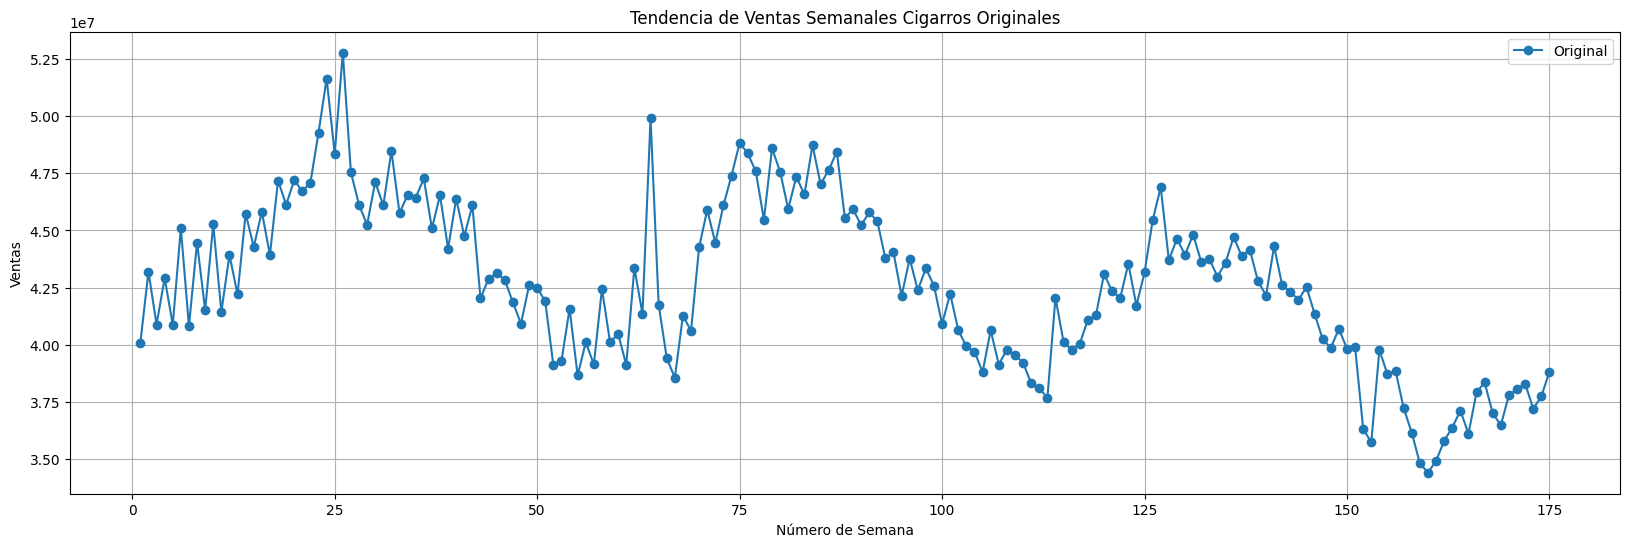

In [22]:
import matplotlib.pyplot as plt

# Filtrar los datos del competidor 1
competidor_1 = frame[frame['Competidor'] == 'Benson']

# Agrupar por Número de semana y sumar las ventas de Producto 1 y Producto 2
ventas_semanales = competidor_1.groupby('Número semana').sum()[['Original']]

# Gráfico de líneas
plt.figure(figsize=(20, 6))
plt.plot(ventas_semanales.index, ventas_semanales['Original'], marker='o', label='Original')
plt.title('Tendencia de Ventas Semanales Cigarros Originales')
plt.xlabel('Número de Semana')
plt.ylabel('Ventas')
plt.legend()
plt.grid(True)
plt.show()


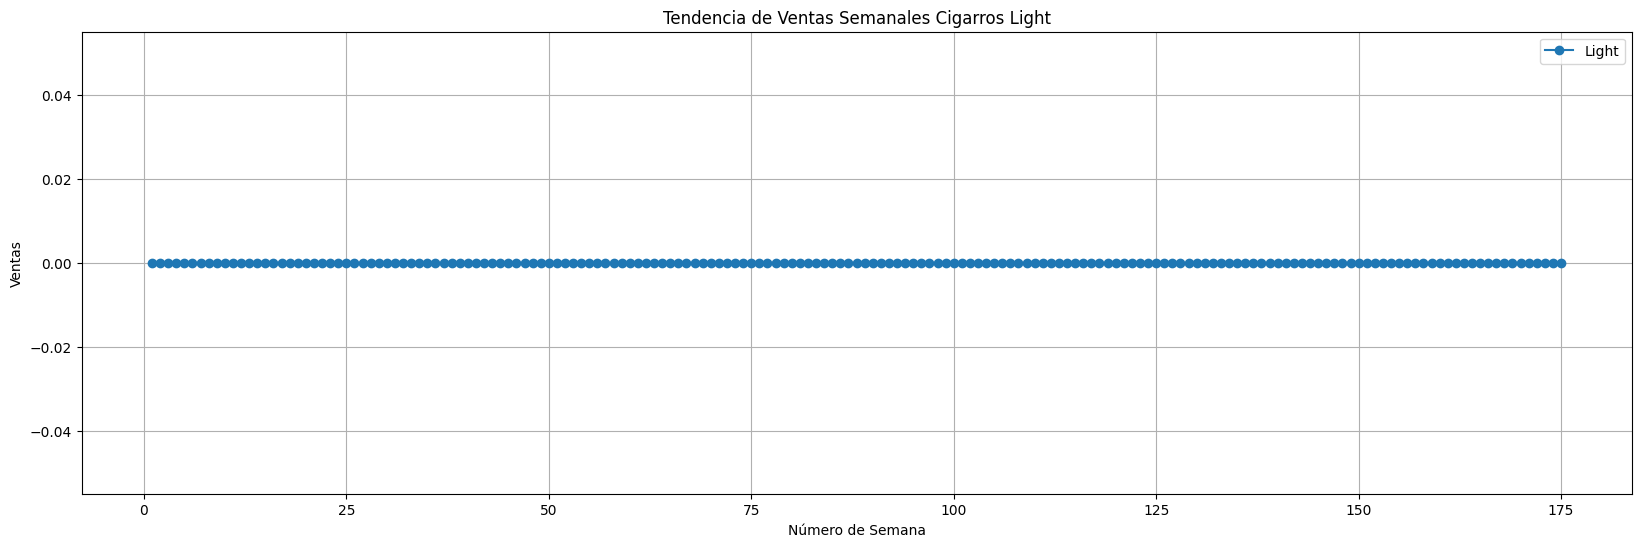

In [27]:
import matplotlib.pyplot as plt

# Filtrar los datos del competidor 1
competidor_1 = frame[frame['Competidor'] == 'Winston']

# Agrupar por Número de semana y sumar las ventas de Producto 1 y Producto 2
ventas_semanales = competidor_1.groupby('Número semana').sum()[['Suave/Light']]

# Gráfico de líneas
plt.figure(figsize=(20, 6))
plt.plot(ventas_semanales.index, ventas_semanales['Suave/Light'], marker='o', label='Light')
plt.title('Tendencia de Ventas Semanales Cigarros Light')
plt.xlabel('Número de Semana')
plt.ylabel('Ventas')
plt.legend()
plt.grid(True)
plt.show()


In [34]:
# Asegurarse de que el número de semana esté ordenado
frame = frame.sort_values(by='Número semana')

# Agrupar los datos por Competidor y Número de semana, y sumar las ventas de Producto 1
ventas_semanales = frame2.groupby(['Competidor', 'Número semana']).sum().reset_index()

# Verificar la estructura de los datos
print(ventas_semanales.head())


  Competidor  Número semana       YMD   Original      Suave
0      Boots              1  20190106  1539561.0  2342992.0
1      Boots              2  20190113  1090031.0  2326228.0
2      Boots              3  20190120  1054273.0  2656372.0
3      Boots              4  20190127  1104712.0  2192280.0
4      Boots              5  20190203  1345256.0  2343314.5


In [43]:
ventas_semanales.to_csv("Ventas Semanales Todos.csv", index=False)

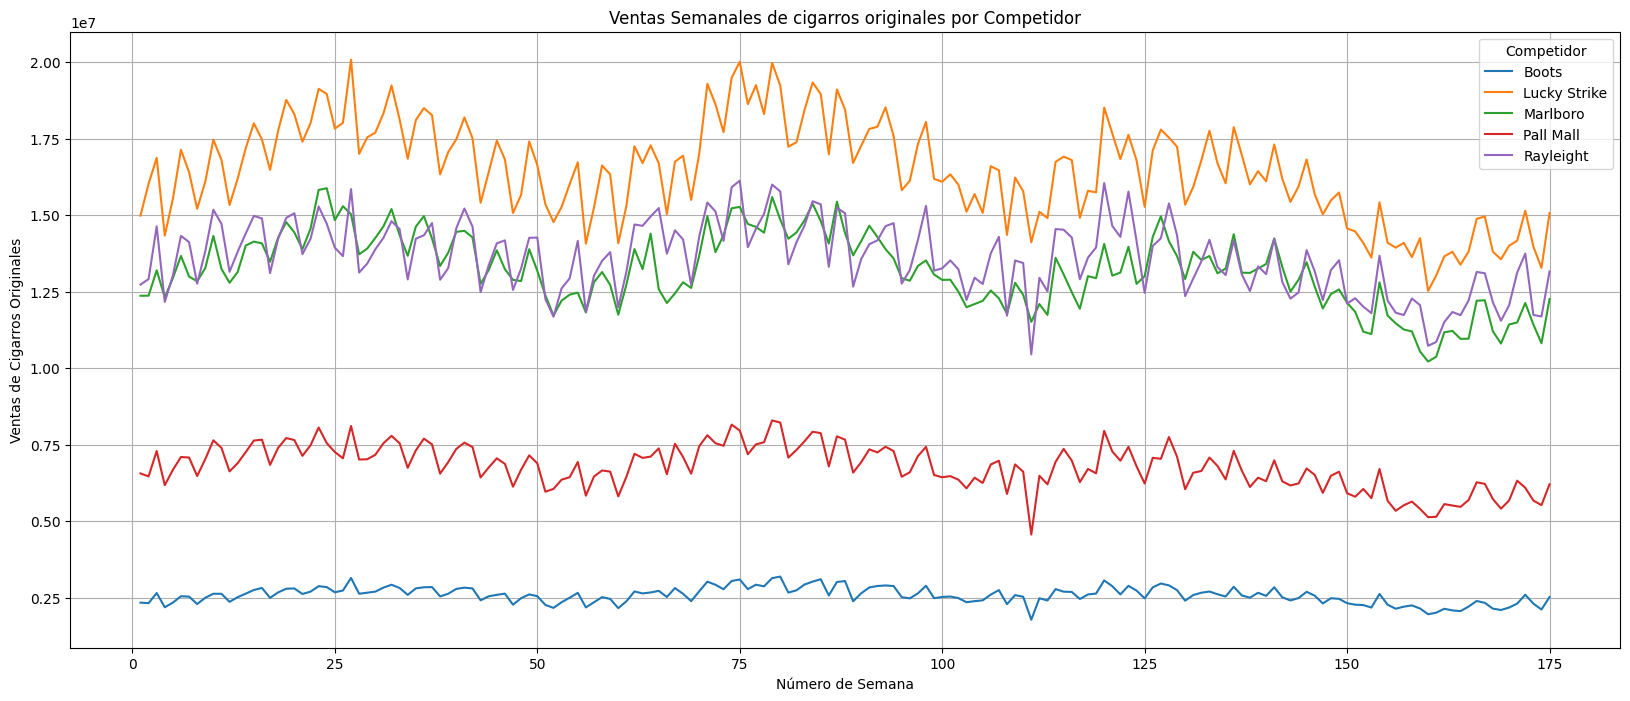

In [42]:
# Graficar las ventas de Producto 1 a lo largo de las semanas para cada competidor
plt.figure(figsize=(20, 8))
ventas_semanales = frame2.groupby(['Competidor', 'Número semana']).sum().reset_index()

for competidor in ventas_semanales['Competidor'].unique():
    competidor_data = ventas_semanales[ventas_semanales['Competidor'] == competidor]
    plt.plot(competidor_data['Número semana'], competidor_data['Suave'], label=competidor)

plt.title('Ventas Semanales de cigarros originales por Competidor')
plt.xlabel('Número de Semana')
plt.ylabel('Ventas de Cigarros Originales')
plt.legend(title='Competidor')
plt.grid(True)
plt.show()


In [44]:
ventas_semanales.to_csv("Ventas Semanales Producto 1.csv", index=False)

In [ ]:
import matplotlib.pyplot as plt

# Agrupar por Competidor y Número de semana, y sumar las ventas
ventas_comparativas = frame.groupby(['Competidor', 'Número semana']).sum()[['Producto 1', 'Producto 2']].reset_index()

# Agrupar por Número de semana y sumar las ventas de Producto 1 y Producto 2
ventas_semanales = competidor_1.groupby('Número semana').sum()[['Suave/Light']]

# Gráfico de líneas
plt.figure(figsize=(20, 6))
plt.plot(ventas_semanales.index, ventas_semanales['Suave/Light'], marker='o', label='Light')
plt.title('Tendencia de Ventas Semanales Cigarros Light')
plt.xlabel('Número de Semana')
plt.ylabel('Ventas')
plt.legend()
plt.grid(True)
plt.show()


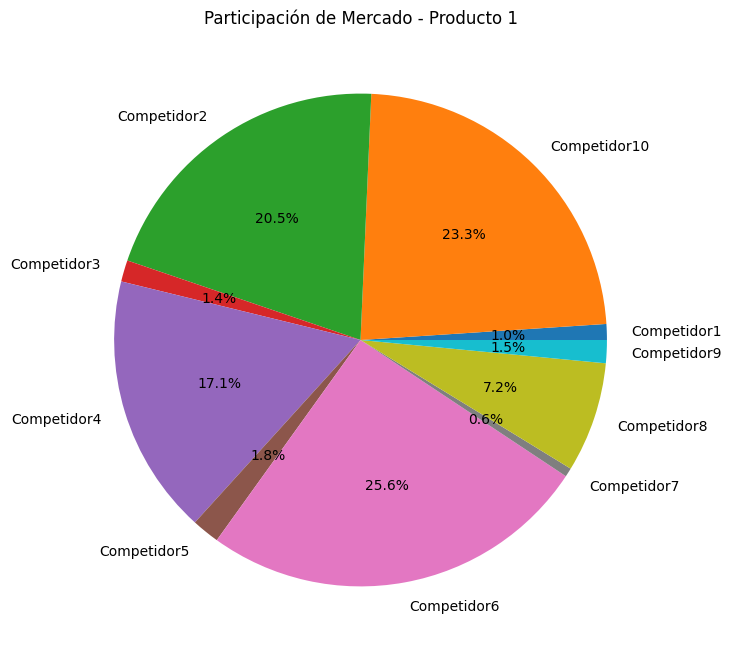

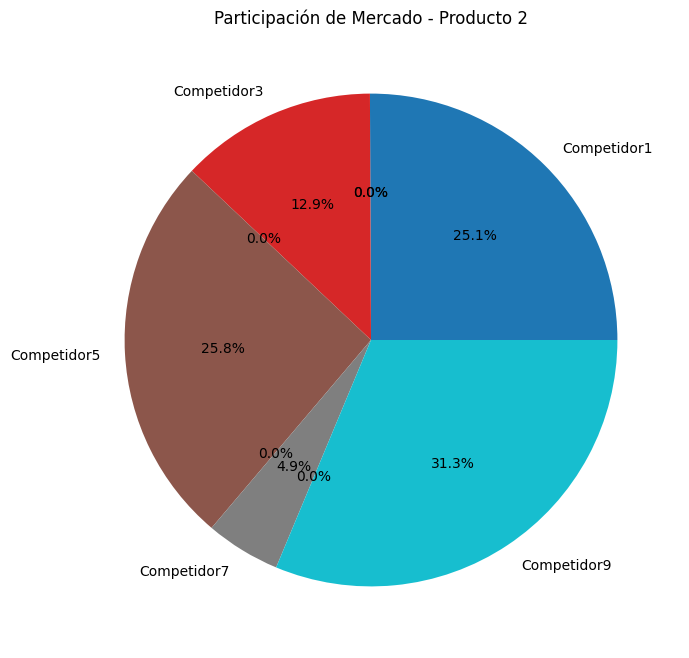

In [5]:
# Calcular el total de ventas por competidor
total_ventas = frame.groupby('Competidor').sum()[['Producto 1', 'Producto 2']]

# Calcular la participación de mercado
total_ventas['Participación Producto 1'] = (total_ventas['Producto 1'] / total_ventas['Producto 1'].sum()) * 100
total_ventas['Participación Producto 2'] = (total_ventas['Producto 2'] / total_ventas['Producto 2'].sum()) * 100

# Gráfico de pastel para Producto 1
total_ventas['Participación Producto 1'].plot(kind='pie', figsize=(8, 8), title='Participación de Mercado - Producto 1', autopct='%1.1f%%')
plt.ylabel('')
plt.show()

# Gráfico de pastel para Producto 2
total_ventas['Participación Producto 2'].plot(kind='pie', figsize=(8, 8), title='Participación de Mercado - Producto 2', autopct='%1.1f%%')
plt.ylabel('')
plt.show()


In [46]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import pmdarima as pm

In [47]:
frame

,YMD,Original,Suave,Número semana,Competidor
0,20190106,2408555.0,12372749.0,1,Marlboro
525,20190106,3792128.0,6565556.5,1,Pall Mall
875,20190106,4374727.0,12738123.0,1,Rayleight
1050,20190106,49876275.5,NaN,1,Faros
350,20190106,40087478.0,NaN,1,Benson
...,...,...,...,...,...
524,20220508,38826079.5,NaN,175,Benson
349,20220508,43983489.5,NaN,175,Camel
174,20220508,1798562.0,12266624.5,175,Marlboro
1574,20220508,14273898.0,NaN,175,Winston


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[52] intercept   : AIC=3879.719, Time=6.15 sec
 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=3906.432, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[52] intercept   : AIC=3886.804, Time=0.42 sec
 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=3877.365, Time=1.69 sec
 ARIMA(0,1,0)(0,0,0)[52]             : AIC=3904.457, Time=0.00 sec
 ARIMA(0,1,1)(0,0,0)[52] intercept   : AIC=3877.780, Time=0.02 sec
 ARIMA(0,1,1)(1,0,1)[52] intercept   : AIC=3879.289, Time=1.06 sec
 ARIMA(0,1,1)(0,0,2)[52] intercept   : AIC=3879.176, Time=3.34 sec
 ARIMA(0,1,1)(1,0,0)[52] intercept   : AIC=3877.301, Time=0.53 sec
 ARIMA(0,1,1)(2,0,0)[52] intercept   : AIC=3879.225, Time=3.74 sec
 ARIMA(0,1,1)(2,0,1)[52] intercept   : AIC=inf, Time=15.64 sec
 ARIMA(0,1,0)(1,0,0)[52] intercept   : AIC=3903.338, Time=0.33 sec
 ARIMA(1,1,1)(1,0,0)[52] intercept   : AIC=3874.070, Time=0.75 sec
 ARIMA(1,1,1)(0,0,0)[52] intercept   : AIC=3875.602, Time=0.05 sec
 ARIMA(1,1,1)(2,0,0)[52

c:\Users\Claudia\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Claudia\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


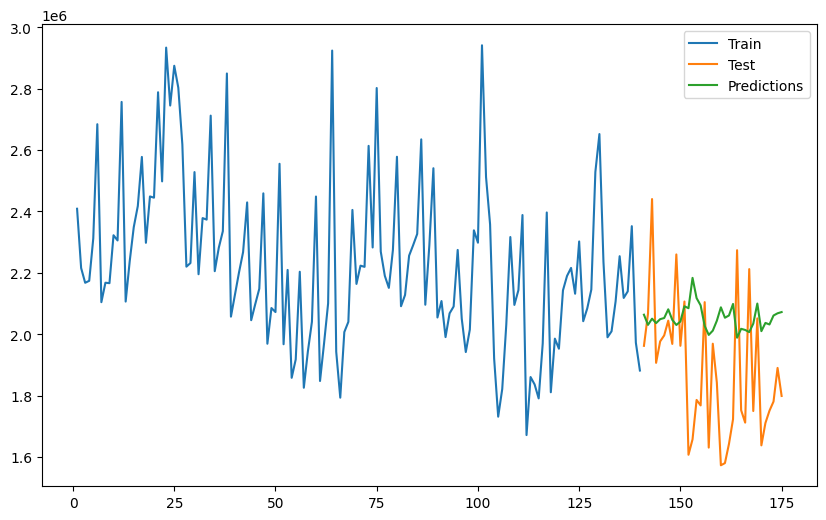

In [50]:
# Filtrar los datos del competidor 1
competidor_1 = frame[frame['Competidor'] == 'Marlboro']

# O usar 'Número semana' como índice
competidor_1.set_index('Número semana', inplace=True)

# Seleccionar la serie temporal de ventas del Producto 1
ventas_producto_1 = competidor_1['Original']

train_size = int(len(ventas_producto_1) * 0.8)
train, test = ventas_producto_1[:train_size], ventas_producto_1[train_size:]

# Ajustar el modelo ARIMA automáticamente
model = pm.auto_arima(train, seasonal=True, m=52, stepwise=True, trace=True)

# Hacer predicciones
predictions = model.predict(n_periods=len(test))

# Evaluar el modelo
error = mean_squared_error(test, predictions)
print(f'Test MSE: {error:.3f}')

# Graficar las predicciones y los datos reales
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, predictions, label='Predictions')
plt.legend()
plt.show()
